# Machine Learning With Python
Mohammad Monirul Hasan Tipu

Researcher, BARI, Gazipur, Bangladesh

Objectives:
- (A) Load the data, 
- (B) Separating the numeric features and target variable, 
- (C) Split the original dataset into the train set (80%) and the test set (20%), 
- (D) Perform Linear Regression and Predict the 'Price' from the test set, 
- (E) Find the RMSE value from the actual test data and the predicted data.
- Perform One-hot Encoding
- Split the original dataset into the train set (80%) and the test set (20%), 
- Perform Linear Regression and Predict the 'Price' from the test set, 
- Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)
- (F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.
- (G) Compare the actual and predicted target variable through visualization

Original data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#### Import required Libraries

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Changing the directory

In [126]:
os.chdir(r'G:\Tipu_BARI_2013\Online courses\EMK_Data Analysis with Python\Data_Analysis_with_Python-main')
os.getcwd()

'G:\\Tipu_BARI_2013\\Online courses\\EMK_Data Analysis with Python\\Data_Analysis_with_Python-main'

#### Load data

In [127]:
df = pd.read_csv("audi.csv")
display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


#### Data information

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


#### Viewing the column names

In [129]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


#### Separating the features and target variable

In [130]:
# only numeric features
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(10668, 4) (10668, 1)


#### Create train and test set

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 4) (2134, 4) (8534, 1) (2134, 1)


#### Linear Regression

In [132]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Price prediction

In [133]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 8404.61685932]
 [25242.08315391]
 [29769.42539605]
 ...
 [15223.19196191]
 [25409.82306727]
 [12240.88891797]]


In [134]:
print(y_test)

       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]


#### Find the RMSE value

In [135]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

5719.124258888148


### End of Assignment "HW1"

#### One-hot Encoding

In [136]:
df = pd.get_dummies(df, drop_first=True)

#### Separating the features and target variable

In [137]:
target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(10668, 33) (10668, 1)


#### Create train and test set

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


#### Training with Linear Regression

In [139]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Prediction

In [140]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 6610.13223031]
 [24138.50809734]
 [29867.94104515]
 ...
 [16285.06313705]
 [24273.50178707]
 [10427.25104041]]


#### Linear Regression Coefficients

In [141]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,transmission_Manual,-1.205987e+03
32,fuelType_Petrol,-4.139250e+02
2,mpg,-1.692461e+02
1,mileage,-7.609565e-02
21,model_ RS7,-1.918124e-09
30,transmission_Semi-Auto,1.048772e+02
11,model_ Q2,7.336904e+02
5,model_ A3,1.289843e+03
24,model_ S5,1.295996e+03
6,model_ A4,1.594688e+03


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

#### Intercept

In [142]:
model.intercept_

array([-4060707.74307599])

#### Prediction Error

In [143]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2720.087568599522
mean absolute percentage error =  0.13502741779458297
mean squared error =  17229727.462186992
root mean squared error =  4150.870687239846
coefficient of determination =  0.8859936175487352


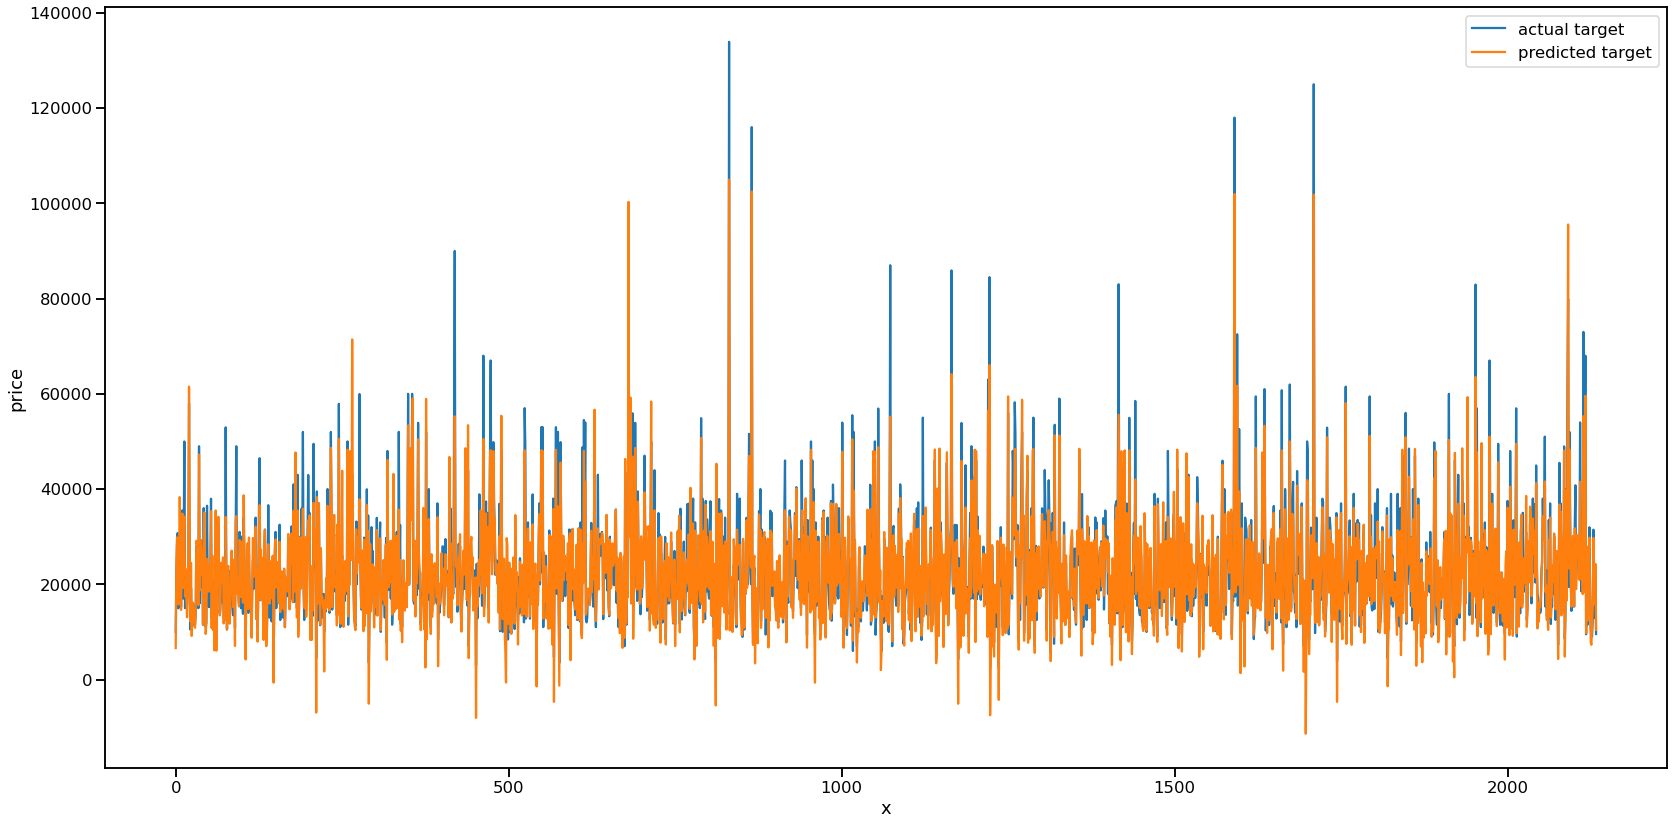

In [144]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(28,14))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

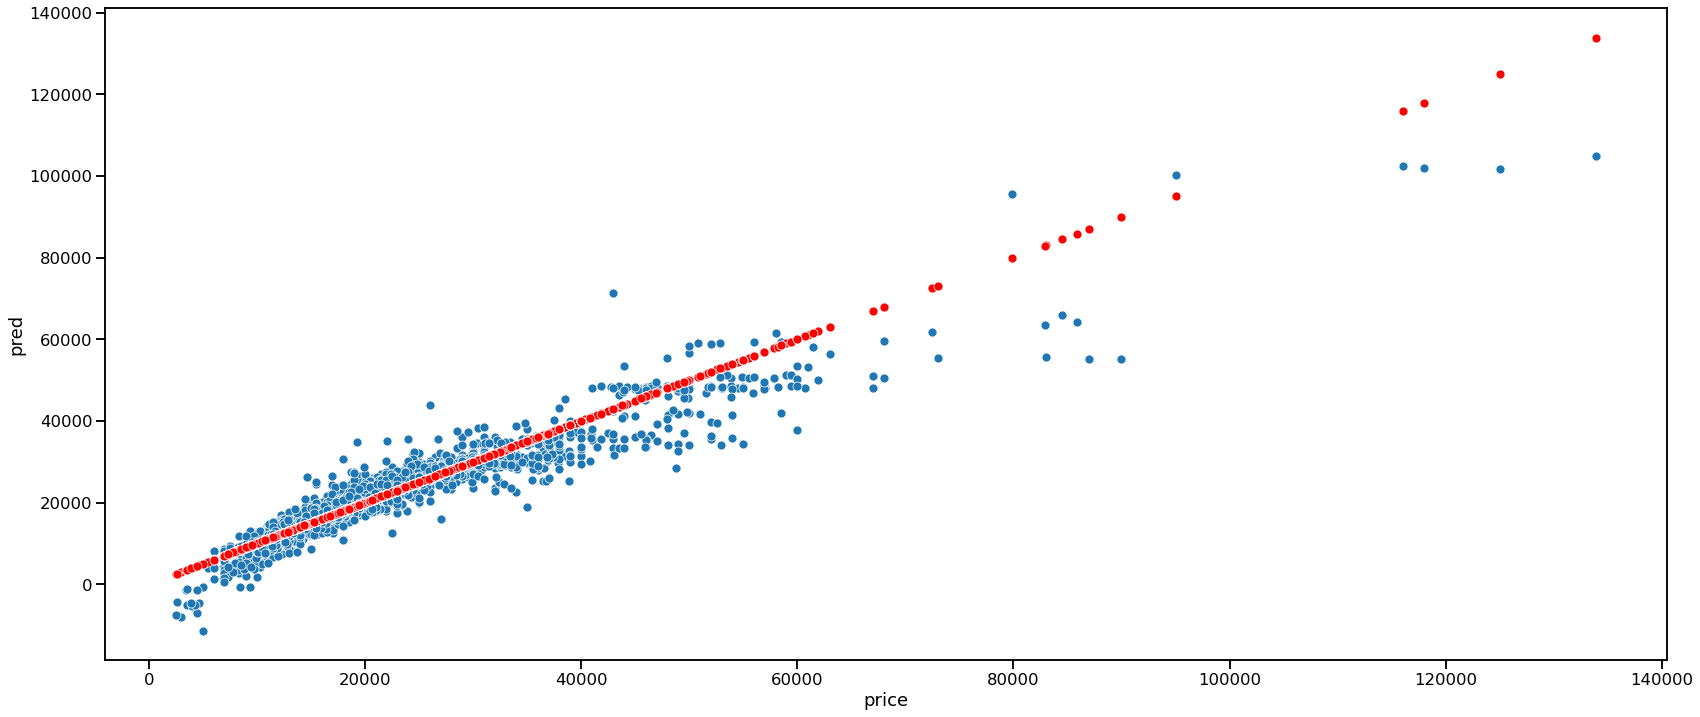

In [145]:
plt.figure(figsize=(28,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

## End of Assignment "HW2"